# Introduction

The goal of this project is to determine whether the K Means method or the Gaussian Mixture Model method is the best method to use with the Marathon dataset. The first thing to do is to moderately alter the dataset so that it can work with a scatter plot for K Means and the second thing to do is to determine the silhouette scores for K Means. The third thing is to plot a scatter plot for Dimensionality with PCA. The fourth thing is to plot a scatter plot for Gaussian Mixture Model and the fifth thing is to determine the silhouette scores for Gaussian Mixture Model. These are the things that will be done for this project.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import umap
import scipy
import sklearn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import fetch_openml
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import datasets, metrics
from sqlalchemy import create_engine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K Means

In [25]:
df = pd.read_csv(("https://raw.githubusercontent.com/llimllib/bostonmarathon/""master/results/2014/results.csv")).dropna()

In [26]:
df.head(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
27,18.78,"Kim, Gyu Dae",15,50.33,M,30,89.52,W14,15,KOR,...,15,3.42,IL,62.72,8.98,41.82,39.65,USA,Champaign,84.75
36,19.37,"Gordian, Aaron",17,54.20,M,49,95.28,W17,17,MEX,...,18,3.65,AZ,66.62,8.93,44.82,42.47,USA,Phoenix,90.07
59,21.47,"Pulido, Jose Sr.",28,58.30,M,33,104.08,W27,28,MEX,...,34,3.98,GA,72.97,10.08,48.77,46.33,USA,Clarkesville,98.48
101,30.82,"Jami, Segundo O. Sr.",24,78.88,M,27,140.87,45,26,ECU,...,30,5.38,CO,95.97,15.23,66.28,62.78,USA,Boulder,132.67
110,32.53,"Sanca, Ruben",21,81.02,M,27,139.08,50,21,CPV,...,22,5.32,MA,97.65,16.23,68.42,64.95,USA,Lowell,131.40
112,32.12,"Troop, Lee",982,82.23,M,41,197.08,75,5000,AUS,...,5710,7.53,CO,109.23,15.68,68.73,65.15,USA,Boulder,183.08
116,33.78,"Forsyth, Ian",255,88.07,M,42,177.48,81,1753,CAN,...,1853,6.78,MI,109.23,16.75,73.08,69.00,USA,Ann Arbor,167.30
119,33.43,"Hartshorn, Chris M.",9,86.80,M,42,155.23,84,164,NZL,...,187,5.93,MA,106.13,16.40,72.47,68.55,USA,Concord,146.00
120,32.37,"Tenorio, Franklin B. Sr.",4,83.92,M,44,147.00,85,53,ECU,...,64,5.62,CO,102.08,15.77,70.20,66.45,USA,Boulder,138.65
125,36.48,"Simon, Lidia",1,92.30,F,40,156.78,F102,24,ROU,...,222,5.98,CO,111.57,18.20,77.57,73.50,USA,Boulder,148.90


In [27]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [28]:
Y = df
Y = df.to_numpy()
df = pd.read_csv(("https://raw.githubusercontent.com/llimllib/bostonmarathon/""master/results/2014/results.csv")).dropna()
df = df.drop(columns=['country','city','state','name','ctz','25k','35k','30k','5k','40k'])
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['bib'] = df['bib'][df['bib'].apply(lambda x: x.isnumeric())]
df = df[df['bib'].notna()]
df.replace('-', '')
X = df
X.head(10)

,10k,division,gender,age,official,bib,genderdiv,overall,pace,half,20k
101,30.82,24,1,27,140.87,45,26,30,5.38,66.28,62.78
110,32.53,21,1,27,139.08,50,21,22,5.32,68.42,64.95
112,32.12,982,1,41,197.08,75,5000,5710,7.53,68.73,65.15
116,33.78,255,1,42,177.48,81,1753,1853,6.78,73.08,69.00
119,33.43,9,1,42,155.23,84,164,187,5.93,72.47,68.55
120,32.37,4,1,44,147.00,85,53,64,5.62,70.20,66.45
176,33.27,62,1,34,148.83,136,67,79,5.68,71.82,68.05
177,33.92,109,1,33,152.88,137,116,135,5.83,73.73,69.92
250,33.78,104,1,33,152.68,228,111,129,5.83,71.67,67.97
310,33.98,51,1,29,147.53,296,56,67,5.63,72.65,68.87


In [29]:
X

,10k,division,gender,age,official,bib,genderdiv,overall,pace,half,20k
101,30.82,24,1,27,140.87,45,26,30,5.38,66.28,62.78
110,32.53,21,1,27,139.08,50,21,22,5.32,68.42,64.95
112,32.12,982,1,41,197.08,75,5000,5710,7.53,68.73,65.15
116,33.78,255,1,42,177.48,81,1753,1853,6.78,73.08,69.00
119,33.43,9,1,42,155.23,84,164,187,5.93,72.47,68.55
120,32.37,4,1,44,147.00,85,53,64,5.62,70.20,66.45
176,33.27,62,1,34,148.83,136,67,79,5.68,71.82,68.05
177,33.92,109,1,33,152.88,137,116,135,5.83,73.73,69.92
250,33.78,104,1,33,152.68,228,111,129,5.83,71.67,67.97
310,33.98,51,1,29,147.53,296,56,67,5.63,72.65,68.87


In [31]:
X.dtypes

10k           object
division       int64
gender         int64
age            int64
official     float64
bib           object
genderdiv      int64
overall        int64
pace         float64
half          object
20k           object
dtype: object

In [34]:
X = df.to_numpy()

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

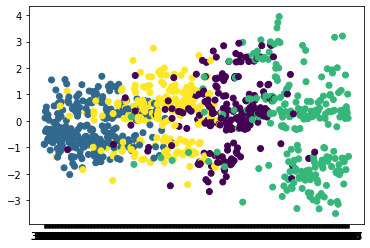

In [35]:
y_pred = KMeans(n_clusters=4, random_state=123).fit_predict(X)

plt.scatter(X[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [36]:
range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=4)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For 4 clusters = {}, silhouette score is {})".format(n_clusters, score))

For 4 clusters = 2, silhouette score is 0.4047529391061201)
For 4 clusters = 3, silhouette score is 0.4047529391061201)
For 4 clusters = 4, silhouette score is 0.4047529391061201)
For 4 clusters = 5, silhouette score is 0.4047529391061201)
For 4 clusters = 6, silhouette score is 0.4047529391061201)
For 4 clusters = 7, silhouette score is 0.4047529391061201)
For 4 clusters = 8, silhouette score is 0.4047529391061201)
For 4 clusters = 9, silhouette score is 0.4047529391061201)


The k value is 4 and 4 is a good value for this scatter plot because having four colors for the clusters is not too simplistic nor is it too complex. Therefore, 4 being the right k value to use for the data fulfills the first assumption for data and the cluster number of k. The four clusters in the scatter plot are not isotropic; therefore, the data does not fulfill the second assumption for data and clusters being isotropic. Also, the four clusters in the scatter plot are not similar in size to each other. As for the silhouette scores, seven of the eight silhouette scores for K Means are all about 0.405 while one of the eight is about 0.402. With only one of the three assumptions regarding data and K Means being met as well as K Means having lower silhouette scores than Gaussian Mixture Model, the K Means method is the second best method to use with the Marathon dataset.

# Dimensionality Reduction With PCA

In [39]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = df.age[indices] / 255.0
y = df.bib[indices]

print(X.shape, y.shape)

(10000,) (10000,)


C:\ANACONDA\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [40]:
X = X.dropna()
X = np.array(X)
X = X.reshape(-1,2)
y = y.dropna()
y = np.array(y)
y = y.reshape(-1,2)

In [41]:
X

array([[0.18039216, 0.23137255],
       [0.12156863, 0.14509804],
       [0.15294118, 0.15686275],
       [0.12156863, 0.16862745],
       [0.16862745, 0.19215686],
       [0.19215686, 0.10196078],
       [0.15294118, 0.19215686],
       [0.15686275, 0.18039216],
       [0.12156863, 0.12156863],
       [0.23137255, 0.14901961],
       [0.15686275, 0.17647059],
       [0.10588235, 0.1254902 ],
       [0.10588235, 0.14901961],
       [0.18431373, 0.17254902],
       [0.11764706, 0.18039216],
       [0.15686275, 0.16862745],
       [0.11764706, 0.15294118],
       [0.19215686, 0.2       ],
       [0.15686275, 0.18039216],
       [0.11764706, 0.19607843],
       [0.18431373, 0.15686275],
       [0.10980392, 0.23921569],
       [0.11764706, 0.16470588],
       [0.1254902 , 0.2       ],
       [0.12156863, 0.1254902 ],
       [0.17254902, 0.19607843],
       [0.15294118, 0.19215686],
       [0.13333333, 0.14117647],
       [0.14901961, 0.1254902 ],
       [0.11764706, 0.14901961],
       [0.

In [42]:
y

array([['22469', '12086'],
       ['3807', '4563'],
       ['569', '20475'],
       ['3807', '4356'],
       ['10010', '10155'],
       ['16979', '34578'],
       ['2162', '2298'],
       ['13932', '11527'],
       ['13589', '9898'],
       ['33928', '18513'],
       ['19952', '31980'],
       ['8711', '32608'],
       ['8711', '2681'],
       ['4211', '35550'],
       ['30583', '12019'],
       ['2408', '18437'],
       ['33088', '2162'],
       ['12847', '11204'],
       ['20004', '12904'],
       ['29221', '13813'],
       ['13816', '20834'],
       ['1893', '24286'],
       ['1168', '17076'],
       ['16457', '19289'],
       ['17897', '2497'],
       ['16300', '24006'],
       ['4544', '3583'],
       ['35403', '3255'],
       ['16831', '10426'],
       ['2976', '19215'],
       ['32055', '29191'],
       ['11435', '10688'],
       ['7483', '29989'],
       ['1244', '29347'],
       ['1422', '15468'],
       ['20117', '32055'],
       ['640', '35562'],
       ['10674', '2119'],
  

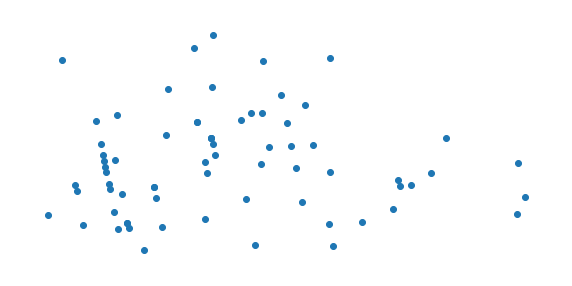

In [45]:
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The scatter plot for Dimensionality with PCA has many dots that are scattered around instead of being clumped together.

# Clustering With Gaussian Mixture Models

In [46]:
X = df.age[indices] / 255.0
y = df.bib[indices]

C:\ANACONDA\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [47]:
X = X.dropna()
X = np.array(X)
X = X.reshape(-1,2)

In [48]:
X

array([[0.18039216, 0.23137255],
       [0.12156863, 0.14509804],
       [0.15294118, 0.15686275],
       [0.12156863, 0.16862745],
       [0.16862745, 0.19215686],
       [0.19215686, 0.10196078],
       [0.15294118, 0.19215686],
       [0.15686275, 0.18039216],
       [0.12156863, 0.12156863],
       [0.23137255, 0.14901961],
       [0.15686275, 0.17647059],
       [0.10588235, 0.1254902 ],
       [0.10588235, 0.14901961],
       [0.18431373, 0.17254902],
       [0.11764706, 0.18039216],
       [0.15686275, 0.16862745],
       [0.11764706, 0.15294118],
       [0.19215686, 0.2       ],
       [0.15686275, 0.18039216],
       [0.11764706, 0.19607843],
       [0.18431373, 0.15686275],
       [0.10980392, 0.23921569],
       [0.11764706, 0.16470588],
       [0.1254902 , 0.2       ],
       [0.12156863, 0.1254902 ],
       [0.17254902, 0.19607843],
       [0.15294118, 0.19215686],
       [0.13333333, 0.14117647],
       [0.14901961, 0.1254902 ],
       [0.11764706, 0.14901961],
       [0.

In [49]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [50]:
y = y.dropna()
y = np.array(y)
y = y.reshape(-1,2)

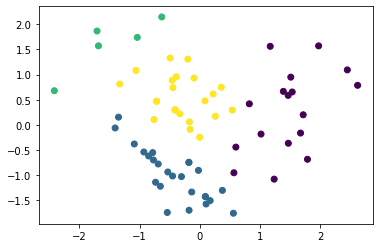

In [64]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_pca = PCA(2).fit_transform(X_std)
gmm_cluster4 = GaussianMixture(n_components=4, random_state=123)#4
# Fit model
clusters4 = gmm_cluster4.fit_predict(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters4)
plt.show()



In [54]:
range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=4)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For 4 clusters = {}, silhouette score is {})".format(n_clusters, score))

For 4 clusters = 2, silhouette score is 0.4241037106027962)
For 4 clusters = 3, silhouette score is 0.4241037106027962)
For 4 clusters = 4, silhouette score is 0.41508611004657586)
For 4 clusters = 5, silhouette score is 0.41508611004657586)
For 4 clusters = 6, silhouette score is 0.41472489928527245)
For 4 clusters = 7, silhouette score is 0.4241037106027962)
For 4 clusters = 8, silhouette score is 0.41472489928527245)
For 4 clusters = 9, silhouette score is 0.424697986549847)


The k value is 4 and 4 is a good value for this scatter plot because having four colors for the clusters is not too simplistic nor is it too complex; therefore, 4 being the right k value to use for the data fulfills the first assumption for data and the k distributions. The four distributions are Gaussians; therefore, the second assumption for k distributions being Gaussians is met. Three of the eight silhouette scores for Gaussian Mixture Model are all about 0.424 while five of the eight are all about 0.415. With both of the assumptions regarding Gaussian Mixture Model being fulfilled as well as Gaussian Mixture Model having higher silhouette scores than K Means, the Gaussian Mixture Model method is the best method to use with the Marathon dataset.

# Summary

   The goal of my project was to ascertain whether the K Means method or the Gaussian Mixture Model method was the best method to use with the Marathon dataset. For the first step of the project, I made a scatter plot for K Means and I found that the data only matched one of the three assumptions of K Means. The assumption that was met was the cluster number being k; and the two assumptions that were not met were clusters being isotropic and clusters having similar variance. For the second step, I determined that seven of the silhouette scores for K Means were about 0.405 while the other score was about 0.402. As for the third step, I made a scatter plot for the Dimensionality of PCA, and I found that there were many dots in the graph and that these dots were scattered around the graph instead of being clumped together. 
      I then made a scatter plot for Gaussian Mixture Model and I found that the data matched both of the assumptions of Gaussian Mixture Model for the fourth step. The two assumptions that were met were there being k distributions that generate the data and all of the k distributions being Gaussians. Also, I determined that three of the eight silhouette scores for Gaussian Mixture Model were about 0.424 while five of the eight were about 0.415 for the fifth step. With these findings, it was made clear that the Gaussian Mixture Model method was better than K Means method for the Marathon dataset.